| Übungszettel 12 | Einführung in die Numerik |
|---|---|
| Dozent      | Prof. Kanschat |
| Tutoren     | S. Meggendorfer und J. Witte |
| Abgabe      | bis 15.07.21 23.15 Uhr |
| Studierende | *bitte Vor- und Nachnamen einfügen* |

### Aufgabe: LR-/QR-Zerlegung mit Nachiteration

1. Implementieren Sie eine Funktion die iterativ Fehlerkorrekturen für das Gleichungssystem $$A x = b$$ mithilfe der Funktion `solve_lr(...)` (vorheriges Übungsblatt) berechnet. Es sei $k$ die Anzahl der Iterationen, sodass für $k=1$ das iterative Verfahren mit `solve_lr(...)` übereinstimmt. Für $k \geq 2$ sprechen wir von einem [LR-Verfahren mit Nachiteration](https://de.wikipedia.org/wiki/Gau%C3%9Fsches_Eliminationsverfahren#Nachiteration). Diskutieren sie die Resultate für verschiedene $k$ bzgl. einer $(n \times n)$ - Hilbertmatrix $A$, $n = 5,\ldots,20$.

2. Implementieren Sie ein direktes Lösungsverfahren `solve_qr(...)` basierend auf der QR-Zerlegung `scipy.linalg.qr(...)`. Verwenden Sie in 1. das QR- anstatt des LR-Verfahrens und vergleichen Sie die Resultate.

3. Diskutieren Sie 1. und 2. für eine $(n \times n)$ - Pascalmatrix $A$, $n = 5,\ldots,20$. Verwenden Sie `scipy.linalg.pascal(n)`.

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def solve_qr(a, b):
    q, r = la.qr(a)
    return la.solve_triangular(r, q.T @ b)

def solve_lr(A, b, k = 1, qr = False):
    x = la.lu_solve(la.lu_factor(A), b)
    for i in range(1, k):
        r = b - (A @ x)
        x += solve_qr(A, r) if qr else solve_lr(A, r)
    return x

def test(n, k = 1, qr = False, pascal = False):
    a = la.pascal(n) if pascal else la.hilbert(n)
    x_1 = np.ones(n)
    b = a @ x_1
    x_2 = solve_lr(a, b, k, qr)
    
    error = x_1 - x_2
    
    error_1 = np.sum(np.abs(error))
    error_2 = np.sqrt(np.sum(error**2))
    error_inf = np.max(np.abs(error))
    
    res = (a @ x_2) - b
    
    res_1 = np.sum(np.abs(res))
    res_2 = np.sqrt(np.sum(res**2))
    res_inf = np.max(np.abs(res))
    
    return (error_1, error_2, error_inf, res_1, res_2, res_inf)

def plot(qr = False, pascal = False):
    kmax = 100
    error_1 = np.zeros(16 * kmax)
    error_2 = np.zeros(16 * kmax)
    error_inf = np.zeros(16 * kmax)
    res_1 = np.zeros(16 * kmax)
    res_2 = np.zeros(16 * kmax)
    res_inf = np.zeros(16 * kmax)

    for i in range(error_1.size):
        (error_1[i], error_2[i], error_inf[i], res_1[i], res_2[i], res_inf[i]) = test(i//kmax + 5, i % kmax + 1)

    for i in range(0, 16 * kmax, kmax):
        plt.figure()
        plt.plot(np.arange(1, kmax + 1), error_1[i: i + kmax], label = r'$|| x - x^*||_1$')
        plt.plot(np.arange(1, kmax + 1), error_2[i: i + kmax], label = r'$|| x - x^*||_2$')
        plt.plot(np.arange(1, kmax + 1), error_inf[i: i + kmax], label = r'$|| x - x^*||_\infty$')
        plt.plot(np.arange(1, kmax + 1), res_1[i: i + kmax], label = r'$|| Hx - b||_1$')
        plt.plot(np.arange(1, kmax + 1), res_2[i: i + kmax], label = r'$|| Hx - b||_2$')
        plt.plot(np.arange(1, kmax + 1), res_inf[i: i + kmax], label = r'$|| Hx - b ||_\infty$')
        plt.xlabel("k")
        plt.title(f"n = {i//kmax + 5}")

<ipython-input-2-3d0a08b8693a>:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


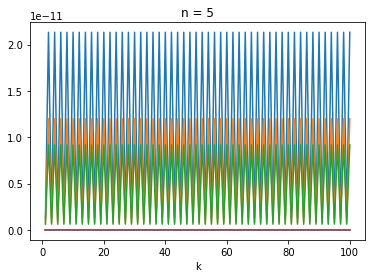

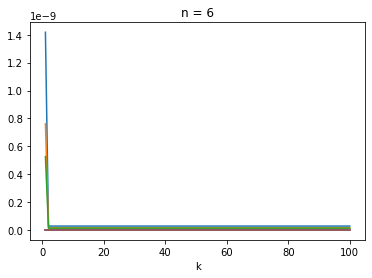

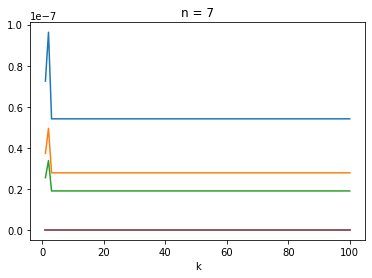

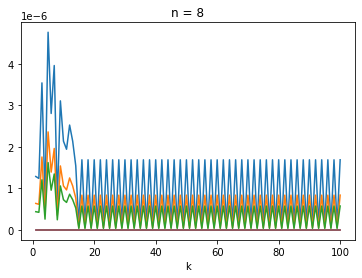

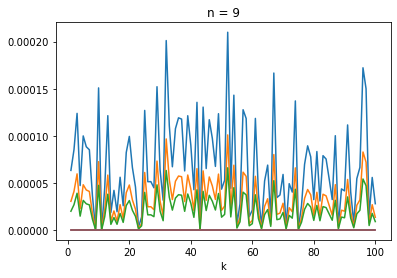

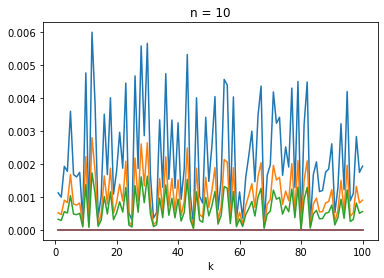

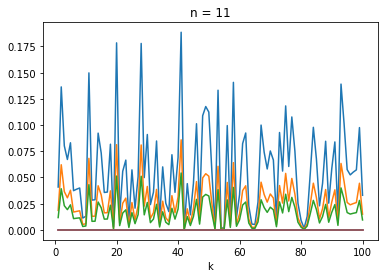

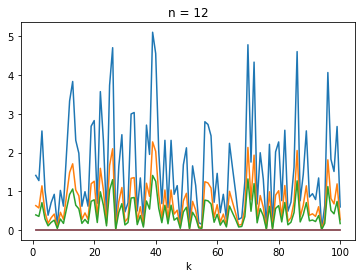

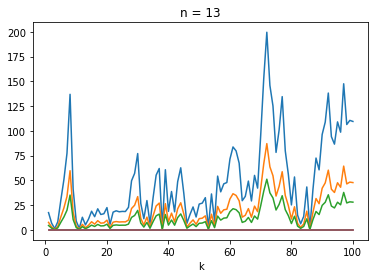

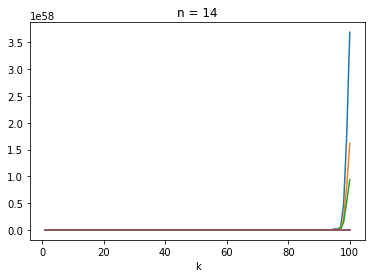

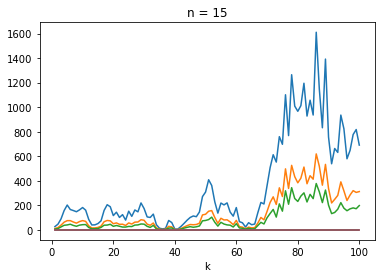

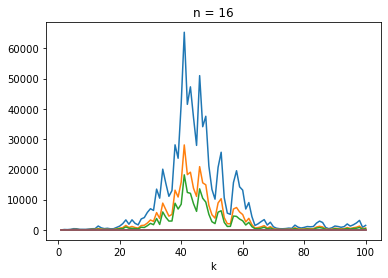

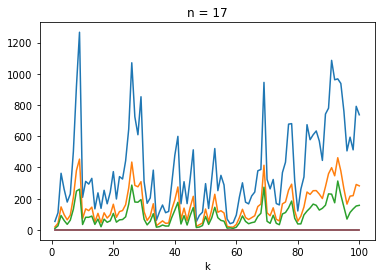

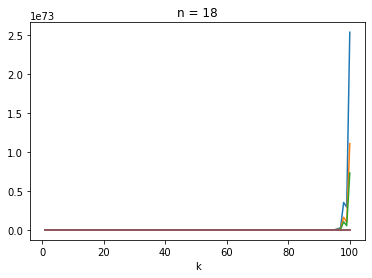

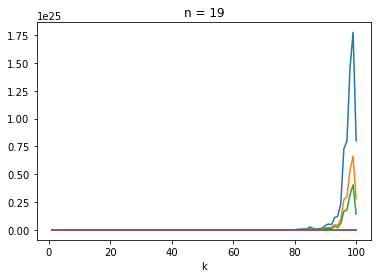

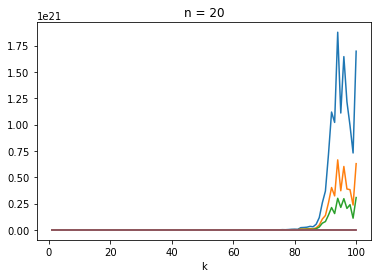

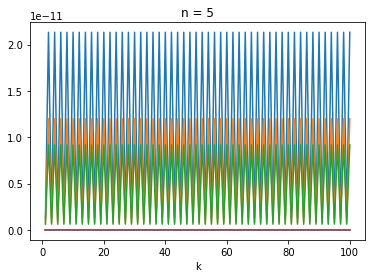

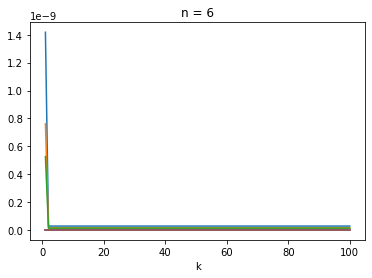

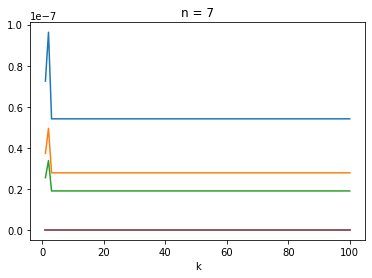

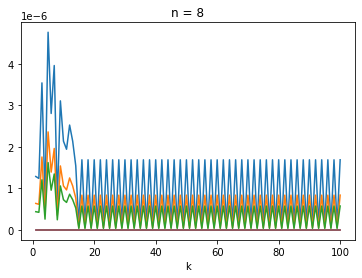

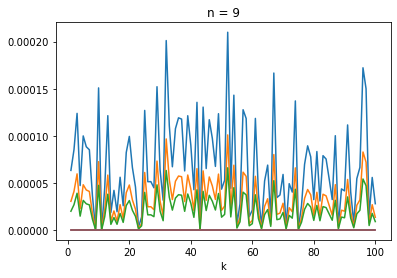

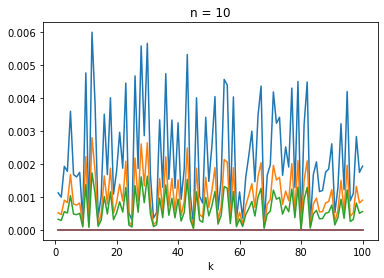

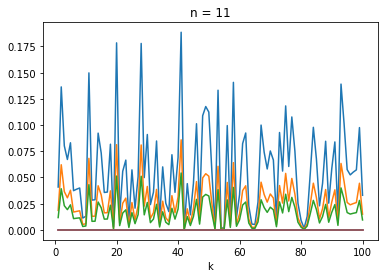

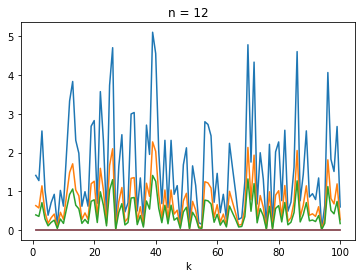

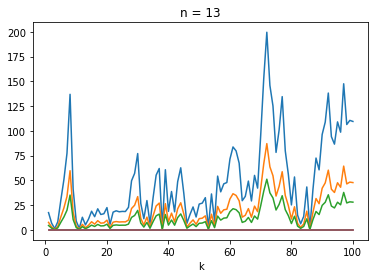

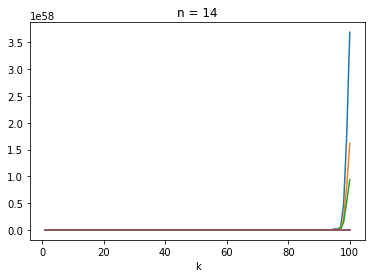

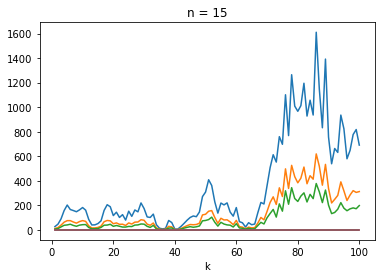

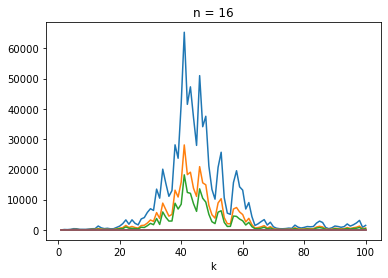

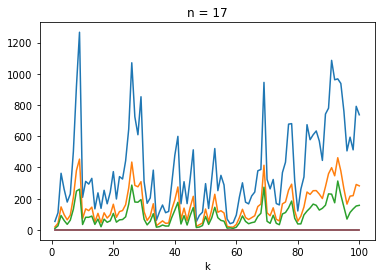

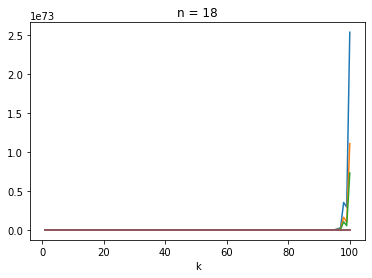

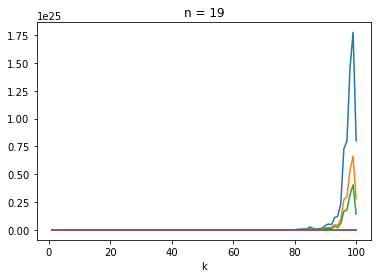

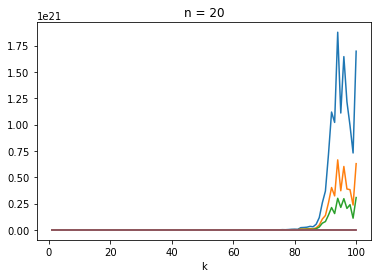

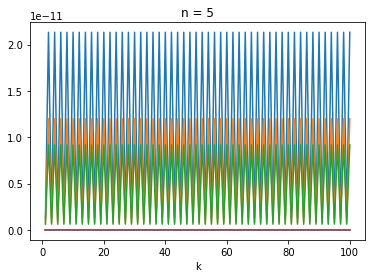

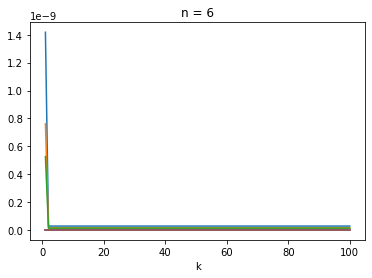

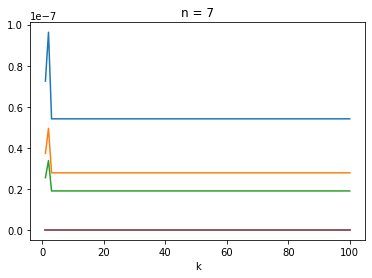

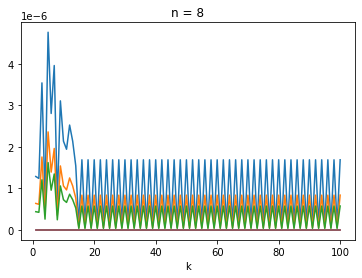

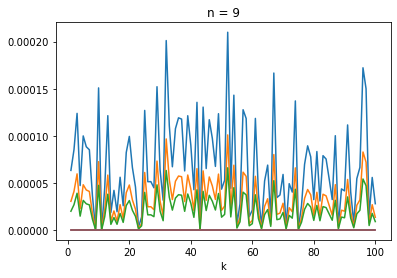

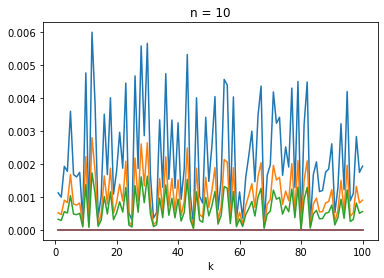

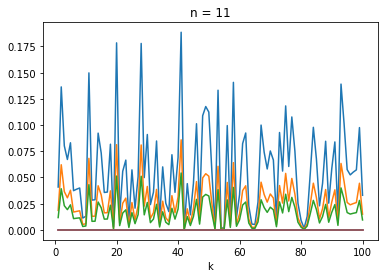

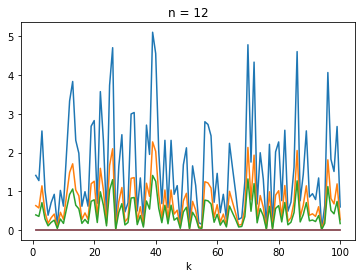

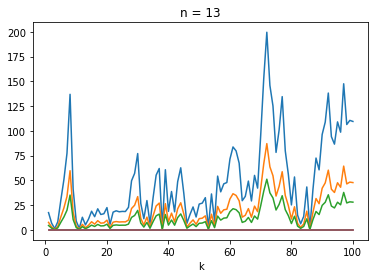

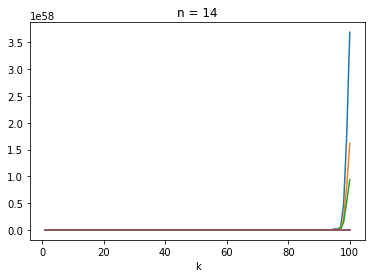

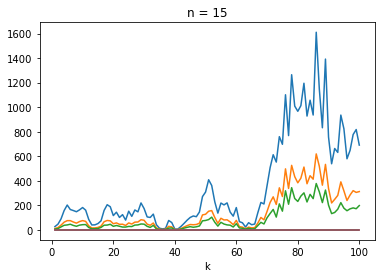

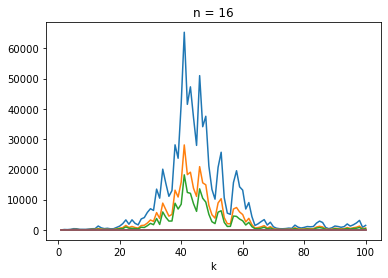

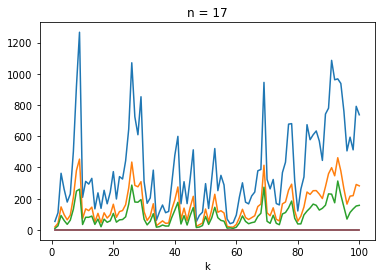

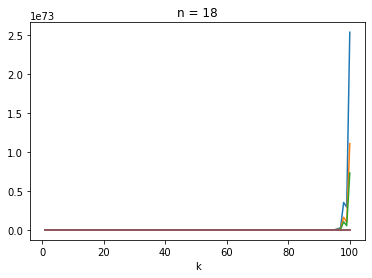

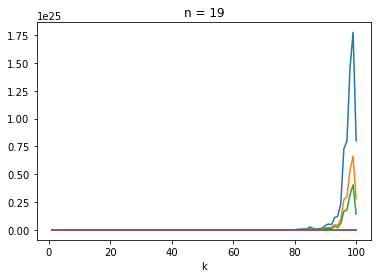

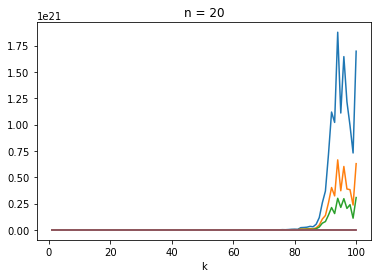

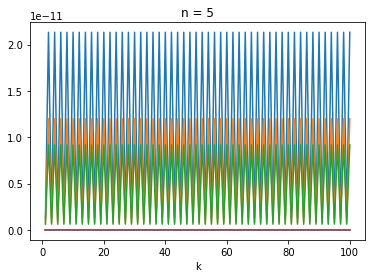

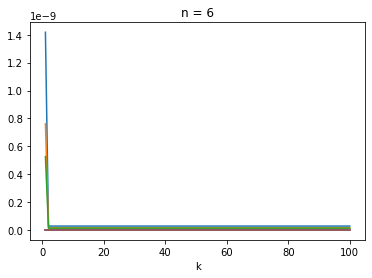

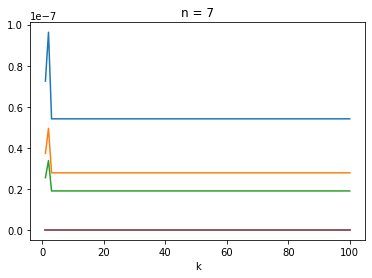

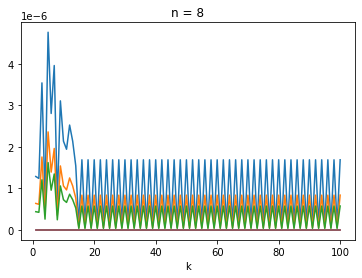

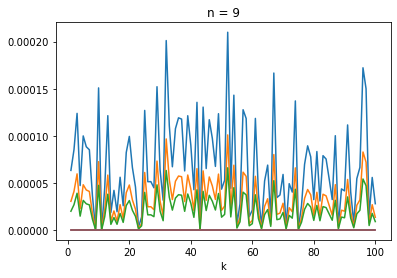

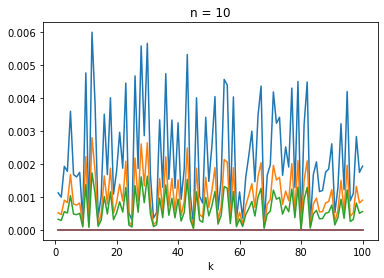

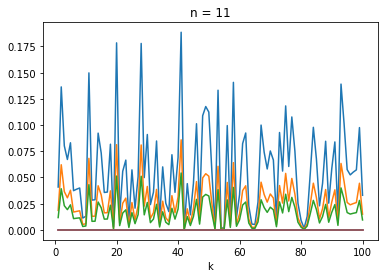

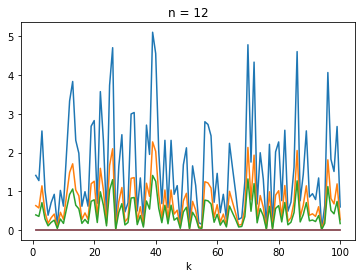

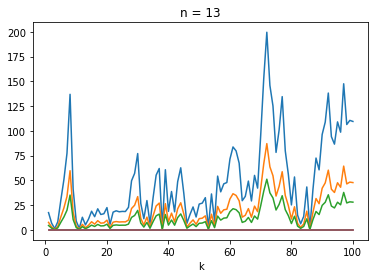

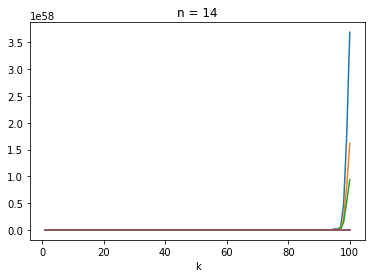

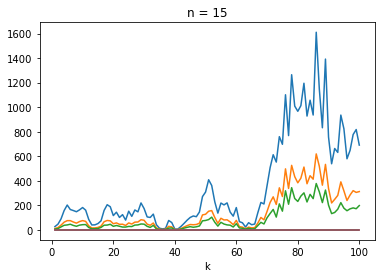

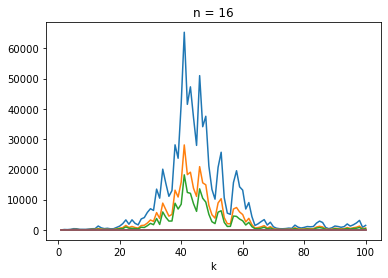

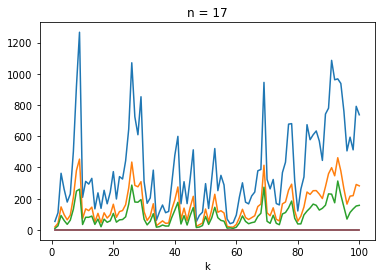

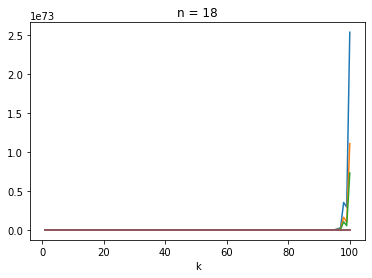

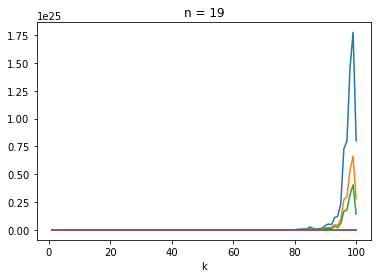

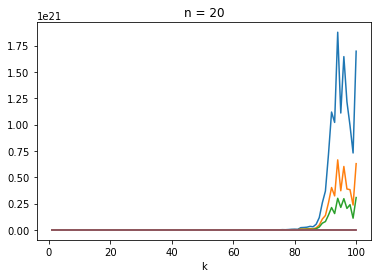

In [3]:
plot()
plot(True)
plot(False, True)
plot(True, True)